In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from tqdm.auto import trange

### Load Data

In [ ]:
# Import data from json file
def read_file(filename):
  lines = []
  with open(filename) as file:
    for line in file:
      lines.append(json.loads(line) )
  df = pd.json_normalize(lines)
  df["helpful_votes"] = df["helpful"].map(lambda votes: votes[0])
  df["num_votes"] = df["helpful"].map(lambda votes: votes[1])
  df["helpful_ratio"] = df["helpful_votes"] / df["num_votes"]
  df = df.drop(columns=['helpful'])

  df["llm_rating"] = pd.to_numeric(df["llm_rating"]) / 100
  return df

# Use these if you want to upload the file directly to the runtime
# reviews = read_file('asin_B0051VVOB2.json')
# reviews = read_file('asin_B0054JZC6E.json')

# This is a google drive path specific to my GDrive, you can also modify this if you want
reviews = read_file('drive/MyDrive/Colab Notebooks/CS 184 Final Project/results.txt')

# EDA

In [ ]:
reviews

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,llm_messages,llm_rating,helpful_votes,num_votes,helpful_ratio
0,AIBRTGBN07D6A,B0051VVOB2,Scott,UPDATE November 2012 - With theKindle Fire HDo...,4.0,A great device WHEN you consider price and fun...,1321228800,"11 14, 2011","[{'role': 'system', 'content': 'Below is an in...",1.00,28475,29284,0.972374
1,AG9G4VUJB6709,B0051VVOB2,waetherman,As a long-time Kindle fan I was eager to get m...,3.0,"I want to love it, I really do. But I can't.",1321315200,"11 15, 2011","[{'role': 'system', 'content': 'Below is an in...",0.95,11118,11618,0.956963
2,A1X1CEGHTHMBL1,B0051VVOB2,jjceo,Update: 12/14/2012If you're interested I just ...,5.0,"Great device, you will enjoy it",1321315200,"11 15, 2011","[{'role': 'system', 'content': 'Below is an in...",0.95,7722,8067,0.957233
3,A10PEXB6XAQ5XF,B0051VVOB2,Michael Gallagher,I've had a chance to play with the Kindle Fire...,5.0,Outstanding Value at $199 and Full of Function...,1321315200,"11 15, 2011","[{'role': 'system', 'content': 'Below is an in...",0.95,4701,4909,0.957629
4,A2V9Z1633UN4JD,B0051VVOB2,Kindle Customer,I am a long-time kindle user. I love my kindl...,1.0,FRAUD on the Fire!! Deregister yours before it...,1321574400,"11 18, 2011","[{'role': 'system', 'content': 'Below is an in...",1.00,3043,3688,0.825108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A2B3HO9WLBWIDL,B0051VVOB2,NaN,"The raise in ""book"" prices announced by severa...",1.0,tessa,1324166400,"12 18, 2011","[{'role': 'system', 'content': 'Below is an in...",0.90,3,15,0.200000
996,A2B77CEDF7E97Z,B0051VVOB2,A. Davis,I'll make this short and save you some time. S...,3.0,My expectations were high for the kindle fire...,1321401600,"11 16, 2011","[{'role': 'system', 'content': 'Below is an in...",0.70,14,15,0.933333
997,A2BDXK3VIZDPH2,B0051VVOB2,NaN,i ordered this hot off the press(i preordered)...,2.0,not what i thought It would be,1324339200,"12 20, 2011","[{'role': 'system', 'content': 'Below is an in...",0.30,4,15,0.266667
998,A2CMPMTI98KBVN,B0051VVOB2,NaN,"Kindle Fire, Full Color 7"" Multi-touch Display...",2.0,Flim Flammed Again,1329523200,"02 18, 2012","[{'role': 'system', 'content': 'Below is an in...",0.80,3,15,0.200000


In [ ]:
np.mean(reviews["overall"])

2.139

In [ ]:
print("Total reviews:", len(reviews["helpful_ratio"]))

# Count number of 0/0
print("Num 0/0 reviews:", sum(reviews["helpful_ratio"].isna()))

# Count number of non-nas
print("Num useful reviews:", len(reviews["helpful_ratio"]) - sum(reviews["helpful_ratio"].isna()))

Total reviews: 1000
Num 0/0 reviews: 0
Num useful reviews: 1000


In [ ]:
reviews["helpful_ratio"].describe()

count    1000.000000
mean        0.375398
std         0.292162
min         0.000000
25%         0.136364
50%         0.285714
75%         0.600000
max         1.000000
Name: helpful_ratio, dtype: float64

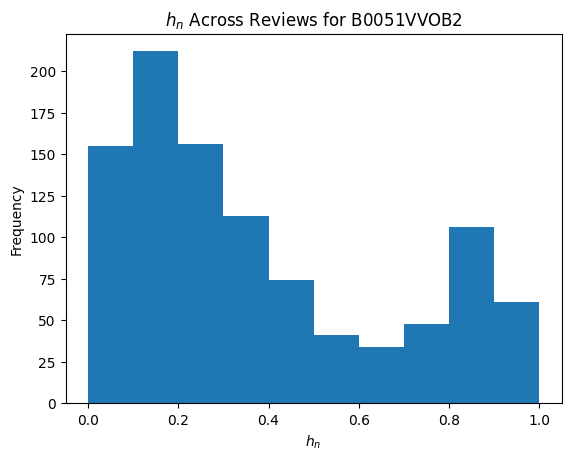

In [ ]:
# Histograph of helpfulness
plt.hist(reviews["helpful_ratio"])
plt.title("$h_n$ Across Reviews for B0051VVOB2")
plt.xlabel("$h_n$")
plt.ylabel("Frequency")

plt.show()

<ipython-input-26-af52f5fedf34>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ratings)


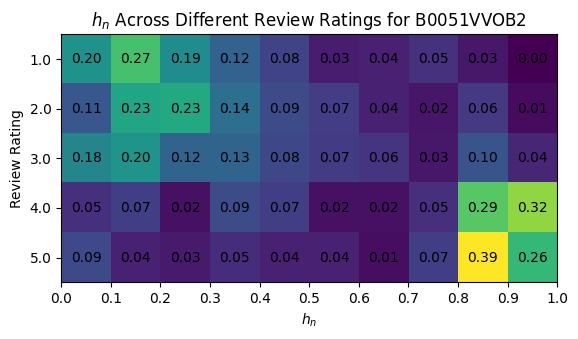

In [ ]:
# Histograph of helpfulness per each review rating
fig, ax = plt.subplots(1, 1)
ratings = [1.0, 2.0, 3.0, 4.0, 5.0]
density_mat = np.empty((len(ratings), 10))
for i, rating in enumerate(ratings):
  df = reviews[reviews['overall'] == rating]
  density, _ = np.histogram(df["helpful_ratio"], range=(0, 1), density=True)
  density_mat[i, :] = density * 0.1

mat = ax.matshow(density_mat)
for (i, j), val in np.ndenumerate(density_mat):
    ax.text(j, i, '{:0.2f}'.format(val), ha='center', va='center')

ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(11) - 0.5)
ax.set_xticklabels(['{:0.1f}'.format(i * 0.1) for i in range(11)])
ax.set_xlabel("$h_n$")
ax.set_ylabel("Review Rating")
ax.set_yticklabels([''] + ratings)
ax.set_title("$h_n$ Across Different Review Ratings for B0051VVOB2")
fig.show()

Text(0.5, 1.0, 'LLM-estimated ratings vs. actual helpfulness ratings')

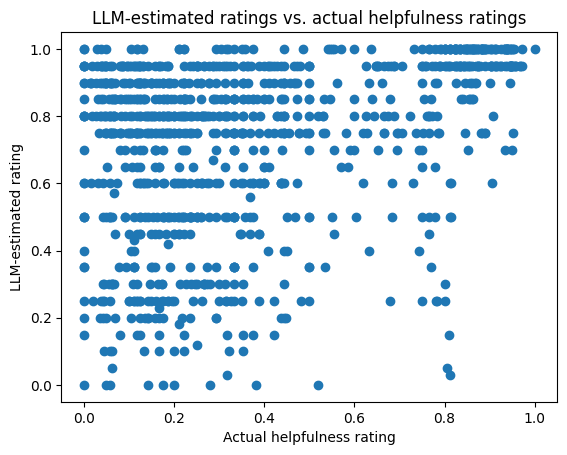

In [ ]:
plt.scatter(reviews["helpful_ratio"], reviews["llm_rating"])
plt.xlabel("Actual helpfulness rating")
plt.ylabel("LLM-estimated rating")
plt.title("LLM-estimated ratings vs. actual helpfulness ratings")

### MAB Implementation

In [ ]:
# Helper functions
seed = 184
rng = np.random.default_rng(seed)

def random_argmax(a):
    '''
    Select the index corresponding to the maximum in the input list.
    Ties are randomly broken.
    '''
    return rng.choice(np.where(a == a.max())[0])

In [ ]:
# Based on the implementation from HW 2
class MAB:
    def __init__(self, mu_list, T=100, init_record=None):
        '''
        Parameters:
            T: horizon
            mu_list: list of true values for bandits
            seed: random seed to make testing consistent
        '''
        self.__K = len(mu_list)
        self.__mu_list = mu_list
        self.__T = T
        # Regret incurred by each arm
        self.__arm_regrets = np.max(mu_list) - mu_list
        self.__init_record = init_record

        # Current time
        self.__t = 0
        # [Num rewards of 0, Num rewards of 1] for each arm
        self.__record = np.zeros((self.__K,2)) if init_record is None else np.copy(init_record)
        # History of regret
        self.__regrets = np.empty(T)

        # Precalculate random numbers to speed things up
        self.__random = rng.random(T)

    def pull(self, ind):
        '''
        Pull the bandit arm with index ind
        '''
        reward = 1 * (self.__random[self.__t] < self.__mu_list[ind])
        self.__record[ind, reward] += 1
        self.__regrets[self.__t] = self.__arm_regrets[ind]
        self.__t += 1
        return reward

    def reset(self):
        self.__t = 0
        self.__record = np.zeros((self.__K,2)) if self.__init_record is None else np.copy(self.__init_record)
        self.__regrets = np.empty(self.__T)

        # Precalculate random numbers to speed things up
        self.__random = rng.random(self.__T)

    def get_record(self):
        return self.__record

    def get_regrets(self):
        return np.cumsum(self.__regrets)

    def get_T(self):
        return self.__T

    def get_K(self):
        return self.__K

In [ ]:
class UCB:
    def __init__(self, MAB, delta=0.05):
        self.MAB = MAB
        self.delta = delta

        self.ucb = np.empty(self.MAB.get_K())
        self.init_ucb()

    def init_ucb(self):
      for arm in range(self.MAB.get_K()):
        wins = self.MAB.get_record()[arm, 1]
        n = wins + self.MAB.get_record()[arm, 0]

        if n == 0:
          self.ucb[arm] = np.inf
        else:
          ci = np.sqrt(np.log(2 * self.MAB.get_K() * self.MAB.get_T() / self.delta) / (2 * n))
          self.ucb[arm] = wins/n + ci

    def reset(self):
        '''
        Reset the instance and eliminate history.
        '''
        self.MAB.reset()
        self.ucb = np.empty(self.MAB.get_K())
        self.init_ucb()

    def play_one_step(self):
        arm = random_argmax(self.ucb)
        self.MAB.pull(arm)

        # Update CI of arm
        wins = self.MAB.get_record()[arm, 1]
        n = wins + self.MAB.get_record()[arm, 0]
        ci = np.sqrt(np.log(2 * self.MAB.get_K() * self.MAB.get_T() / self.delta) / (2 * n))
        self.ucb[arm] = wins/n + ci

In [ ]:
class Thompson_sampling:
    def __init__(self, MAB):
        self.MAB = MAB

    def reset(self):
        '''
        Reset the instance and eliminate history.
        '''
        self.MAB.reset()

    def play_one_step(self):
        '''
        Implement one step of the Thompson sampling algorithm.
        '''
        thetas = rng.beta(self.MAB.get_record()[:, 1] + 1, self.MAB.get_record()[:, 0] + 1)
        arm = random_argmax(thetas)
        reward = self.MAB.pull(arm)

### Experiments

In [ ]:
# For the sake of our experiment, we only want reviews that have a rating
good_reviews = reviews[reviews["helpful_ratio"].notna()]
good_reviews

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,llm_messages,llm_rating,helpful_votes,num_votes,helpful_ratio
0,AIBRTGBN07D6A,B0051VVOB2,Scott,UPDATE November 2012 - With theKindle Fire HDo...,4.0,A great device WHEN you consider price and fun...,1321228800,"11 14, 2011","[{'role': 'system', 'content': 'Below is an in...",1.00,28475,29284,0.972374
1,AG9G4VUJB6709,B0051VVOB2,waetherman,As a long-time Kindle fan I was eager to get m...,3.0,"I want to love it, I really do. But I can't.",1321315200,"11 15, 2011","[{'role': 'system', 'content': 'Below is an in...",0.95,11118,11618,0.956963
2,A1X1CEGHTHMBL1,B0051VVOB2,jjceo,Update: 12/14/2012If you're interested I just ...,5.0,"Great device, you will enjoy it",1321315200,"11 15, 2011","[{'role': 'system', 'content': 'Below is an in...",0.95,7722,8067,0.957233
3,A10PEXB6XAQ5XF,B0051VVOB2,Michael Gallagher,I've had a chance to play with the Kindle Fire...,5.0,Outstanding Value at $199 and Full of Function...,1321315200,"11 15, 2011","[{'role': 'system', 'content': 'Below is an in...",0.95,4701,4909,0.957629
4,A2V9Z1633UN4JD,B0051VVOB2,Kindle Customer,I am a long-time kindle user. I love my kindl...,1.0,FRAUD on the Fire!! Deregister yours before it...,1321574400,"11 18, 2011","[{'role': 'system', 'content': 'Below is an in...",1.00,3043,3688,0.825108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A2B3HO9WLBWIDL,B0051VVOB2,NaN,"The raise in ""book"" prices announced by severa...",1.0,tessa,1324166400,"12 18, 2011","[{'role': 'system', 'content': 'Below is an in...",0.90,3,15,0.200000
996,A2B77CEDF7E97Z,B0051VVOB2,A. Davis,I'll make this short and save you some time. S...,3.0,My expectations were high for the kindle fire...,1321401600,"11 16, 2011","[{'role': 'system', 'content': 'Below is an in...",0.70,14,15,0.933333
997,A2BDXK3VIZDPH2,B0051VVOB2,NaN,i ordered this hot off the press(i preordered)...,2.0,not what i thought It would be,1324339200,"12 20, 2011","[{'role': 'system', 'content': 'Below is an in...",0.30,4,15,0.266667
998,A2CMPMTI98KBVN,B0051VVOB2,NaN,"Kindle Fire, Full Color 7"" Multi-touch Display...",2.0,Flim Flammed Again,1329523200,"02 18, 2012","[{'role': 'system', 'content': 'Below is an in...",0.80,3,15,0.200000


In [ ]:
def run_mab(algo, n=30):
  """
    Runs the MAB algorithm for a given number of trials. Calculates average regret as well as 5% and 95% CIs around regret.

    Params:
      algo: The MAB algorithm to run (UCB or Thompson_sampling)
      n: Number of trials
  """
  T = algo.MAB.get_T()
  run_regrets = np.empty((n, T))
  for i in trange(n, desc=f"{type(algo).__name__} runs"):
    algo.reset()
    for _ in range(T):
      algo.play_one_step()
    run_regrets[i,:] = algo.MAB.get_regrets()

  regret_avg = np.mean(run_regrets, axis=0)
  regret_5 = np.percentile(run_regrets, 5, axis=0)
  regret_95 = np.percentile(run_regrets, 95, axis=0)

  return (regret_avg, regret_5, regret_95)

In [ ]:
# Parameters
hn = good_reviews["helpful_ratio"].to_numpy()
T = 10000

In [ ]:
mab = MAB(hn, T=T)
ucb = UCB(mab)
thompson = Thompson_sampling(mab)
u_avg, u_5, u_95 = run_mab(ucb)
t_avg, t_5, t_95 = run_mab(thompson)

UCB runs:   0%|          | 0/30 [00:00<?, ?it/s]

Thompson_sampling runs:   0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
def get_init_record(M):
  """
    We initialize the record by pretending we had M people rate the review beforehand,
    based on the given llm_rating.
  """
  init_record = np.empty((len(good_reviews), 2))
  init_record[:, 0] = (1 - good_reviews["llm_rating"]) * M
  init_record[:, 1] = good_reviews["llm_rating"] * M

  return init_record

init_record = get_init_record(10)
llm_mab = MAB(hn, init_record=init_record, T=T)

llm_ucb = UCB(llm_mab)
llm_thompson = Thompson_sampling(llm_mab)
l_u_avg, l_u_5, l_u_95 = run_mab(llm_ucb)
l_t_avg, l_t_5, l_t_95 = run_mab(llm_thompson)

UCB runs:   0%|          | 0/30 [00:00<?, ?it/s]

Thompson_sampling runs:   0%|          | 0/30 [00:00<?, ?it/s]

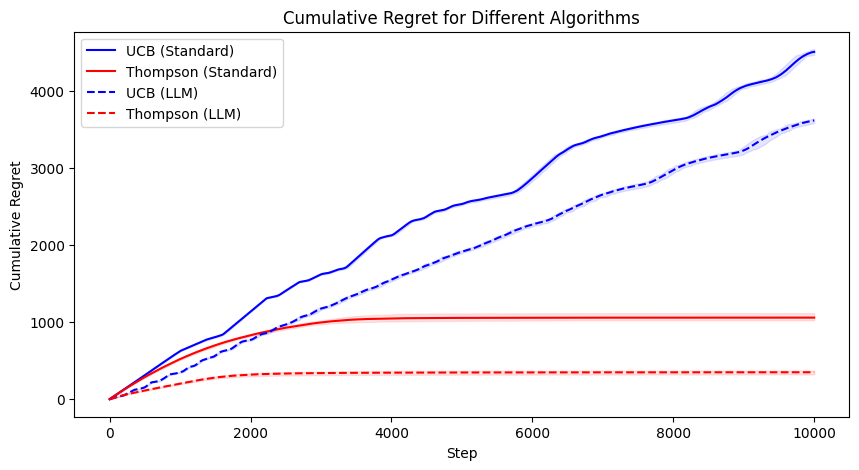

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

steps = np.arange(T)
ax.plot(steps, u_avg, 'b-', label="UCB (Standard)")
ax.fill_between(steps, u_5, u_95, color='b', alpha=.1)
ax.plot(steps, t_avg, 'r-', label="Thompson (Standard)")
ax.fill_between(steps, t_5, t_95, color='r', alpha=.1)

ax.plot(steps, l_u_avg, 'b--', label="UCB (LLM)")
ax.fill_between(steps, l_u_5, l_u_95, color='b', alpha=.1)
ax.plot(steps, l_t_avg, 'r--', label="Thompson (LLM)")
ax.fill_between(steps, l_t_5, l_t_95, color='r', alpha=.1)

ax.set_xlabel('Step')
ax.set_ylabel('Cumulative Regret')
ax.set_title('Cumulative Regret for Different Algorithms')
ax.set_ylim((0, 4600))
ax_set_xlim((0, 10100))
ax.legend()

plt.show()

In [ ]:
print(u_avg[-1], u_5[-1], u_95[-1])
print(t_avg[-1], t_5[-1], t_95[-1])
print(l_u_avg[-1], l_u_5[-1], l_u_95[-1])
print(l_t_avg[-1], l_t_5[-1], l_t_95[-1])

4505.164675414689 4469.416596918055 4539.247671084825
1058.3828845216176 1021.7691807003686 1116.136872467236
3615.869807923972 3582.508568121939 3640.8451143749035
259.9611412534987 240.30401697421644 279.2736958964438


In [ ]:
# Some basic exploration of how the hyperparameter M impacts regret
Ms = [5, 10, 20, 50, 100]
cs = ['r', 'g', 'y', 'c', 'm']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(steps, t_avg, 'r-', label="Thompson (Standard)")
ax.fill_between(steps, t_5, t_95, color='b', alpha=.1)

for i in range(len(Ms)):
  init_record = get_init_record(Ms[i])
  llm_mab = MAB(hn, init_record=init_record, T=T)

  llm_thompson = Thompson_sampling(llm_mab)
  l_t_avg, l_t_5, l_t_95 = run_mab(llm_thompson)

  ax.plot(steps, l_t_avg, f'{cs[i]}--', label=f"Thompson (LLM, $M={Ms[i]}$)")
  ax.fill_between(steps, l_t_5, l_t_95, color=cs[i], alpha=.1)


ax.set_xlabel('Step')
ax.set_ylabel('Cumulative Regret')
ax.set_title('Cumulative Regret for Different $M$')
ax.legend()

Thompson_sampling runs:   0%|          | 0/30 [00:00<?, ?it/s]

Thompson_sampling runs:   0%|          | 0/30 [00:00<?, ?it/s]

Thompson_sampling runs:   0%|          | 0/30 [00:00<?, ?it/s]